# Project Overview

This project uses a public data set of Android permissions collected from over 29000 benign and malware Android apps.
The goal of my project is to explore several supervised ML algorithms and compare how effectively they 
can distinguish harmless apps from malware. The problem is of interest because computer malware 
on mobile devices has significant economic impact as well as violations of privacy. 
This is a supervised ML problem using a labeled data set. The task is binary classification -- determine whether a given app is 
likely to be malware or not
based on the presence or absence of specific Android permissions.

### Project Repository

https://github.com/albert-kepner/Supervised_ML_Project

### The Data Set

This project uses the NATICUSdroid (Android Permissions) Dataset from UCI ML data repository: https://archive.ics.uci.edu/ml/datasets.php.
A link to this specific data set is here: https://archive-beta.ics.uci.edu/ml/datasets/naticusdroid+android+permissions+dataset .

Citation: Mathur, Akshay & Mathur, Akshay. (2022). NATICUSdroid (Android Permissions) Dataset. UCI Machine Learning Repository.

The data set data.csv can be downloaded from the above website.
The data set consists of 86 features which are either standard or customize Android permissions. These features were selected 
from a larger set possible Android permissions by the data set authors. These features have already been selected
with the goal of maximizing discrimination between malware and benign apps. 
Each permission is either present or absent for a given app. 
So we have 86 columns containing 0 or 1 for the presence of a given permission.
The last column of the data set is the label which is 0 for benign or 1 for malware. 
The data is already clean with no missing values.
There are 29332 rows where each row represents 1 Android app known to be malware or not.
14700 of the apps are malware, and 14632 are benign, so the two classes are evenly balanced.
The data was collected from benign and malware Android applications over the period from 2010 to 2019.

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/data.csv")
df

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29327,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


All the 86 features of this data set are Android permissions and are shown in the following list of columns from the CSV file.

In [5]:
column_names = list(df.columns)
column_names

['android.permission.GET_ACCOUNTS',
 'com.sonyericsson.home.permission.BROADCAST_BADGE',
 'android.permission.READ_PROFILE',
 'android.permission.MANAGE_ACCOUNTS',
 'android.permission.WRITE_SYNC_SETTINGS',
 'android.permission.READ_EXTERNAL_STORAGE',
 'android.permission.RECEIVE_SMS',
 'com.android.launcher.permission.READ_SETTINGS',
 'android.permission.WRITE_SETTINGS',
 'com.google.android.providers.gsf.permission.READ_GSERVICES',
 'android.permission.DOWNLOAD_WITHOUT_NOTIFICATION',
 'android.permission.GET_TASKS',
 'android.permission.WRITE_EXTERNAL_STORAGE',
 'android.permission.RECORD_AUDIO',
 'com.huawei.android.launcher.permission.CHANGE_BADGE',
 'com.oppo.launcher.permission.READ_SETTINGS',
 'android.permission.CHANGE_NETWORK_STATE',
 'com.android.launcher.permission.INSTALL_SHORTCUT',
 'android.permission.android.permission.READ_PHONE_STATE',
 'android.permission.CALL_PHONE',
 'android.permission.WRITE_CONTACTS',
 'android.permission.READ_PHONE_STATE',
 'com.samsung.android.p

# Exploratory Data Analysis

I want to show a correlation matrix heatmap to get an overview of 
how often the various Android permissions (the features) are used together in this data set. 
This is a little challenging with 86 features. So I am going to number 
the feature columns and refer to the columns by number in the visualizations.

### Column Number Key for Android Permissions in this data set

In [6]:
column_numbers = [f'{num}' for num in range(0,87)]
for i in range (87):
    print(f'{column_numbers[i]}\t{column_names[i]}')

0	android.permission.GET_ACCOUNTS
1	com.sonyericsson.home.permission.BROADCAST_BADGE
2	android.permission.READ_PROFILE
3	android.permission.MANAGE_ACCOUNTS
4	android.permission.WRITE_SYNC_SETTINGS
5	android.permission.READ_EXTERNAL_STORAGE
6	android.permission.RECEIVE_SMS
7	com.android.launcher.permission.READ_SETTINGS
8	android.permission.WRITE_SETTINGS
9	com.google.android.providers.gsf.permission.READ_GSERVICES
10	android.permission.DOWNLOAD_WITHOUT_NOTIFICATION
11	android.permission.GET_TASKS
12	android.permission.WRITE_EXTERNAL_STORAGE
13	android.permission.RECORD_AUDIO
14	com.huawei.android.launcher.permission.CHANGE_BADGE
15	com.oppo.launcher.permission.READ_SETTINGS
16	android.permission.CHANGE_NETWORK_STATE
17	com.android.launcher.permission.INSTALL_SHORTCUT
18	android.permission.android.permission.READ_PHONE_STATE
19	android.permission.CALL_PHONE
20	android.permission.WRITE_CONTACTS
21	android.permission.READ_PHONE_STATE
22	com.samsung.android.providers.context.permission.WRI

In [7]:
## I am creating a copy of the data set so that the columns will be labelled with the sequential numbers shown above.
df2 = df.copy()
df2.columns = column_numbers
df2

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29327,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
29330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
## Compute the correlation matrix between all 87 columns
corr = df2.corr()
corr

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,1.000000,-0.013964,-0.079951,0.196896,0.096710,0.034518,-0.012785,0.076991,-0.047679,0.105217,...,0.031399,-0.014106,-0.016655,-0.013611,0.115601,-0.016237,-0.031852,-0.011002,0.110615,0.138456
1,-0.013964,1.000000,-0.025185,0.024802,0.047568,0.136400,-0.022378,0.045782,0.004565,0.145745,...,0.011259,0.021368,0.985484,0.969620,0.038538,0.078998,0.793052,-0.027908,-0.011397,-0.187670
2,-0.079951,-0.025185,1.000000,-0.000435,0.024207,-0.073922,-0.034185,-0.019334,0.574034,-0.017427,...,-0.026817,-0.013699,-0.024483,-0.025214,0.036007,-0.023485,-0.028547,-0.034294,-0.013270,0.184583
3,0.196896,0.024802,-0.000435,1.000000,0.309930,0.081554,0.154866,0.115690,0.150767,0.051156,...,0.071417,-0.007335,0.020717,0.026386,0.025876,0.062909,0.032461,0.149333,0.490849,-0.028821
4,0.096710,0.047568,0.024207,0.309930,1.000000,0.088372,0.045208,0.113085,0.085063,0.040983,...,0.087587,-0.004755,0.048473,0.045056,0.013545,0.085796,0.035908,0.029004,-0.004606,-0.055581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,-0.016237,0.078998,-0.023485,0.062909,0.085796,0.105434,-0.026215,0.062998,-0.000797,0.054276,...,0.025557,-0.006138,0.081880,0.086315,0.035111,1.000000,0.103338,-0.027305,-0.009433,-0.156263
83,-0.031852,0.793052,-0.028547,0.032461,0.035908,0.144295,-0.024881,0.067539,0.033771,0.133456,...,0.019484,0.012087,0.801804,0.795122,0.031760,0.103338,1.000000,-0.025953,-0.009364,-0.152853
84,-0.011002,-0.027908,-0.034294,0.149333,0.029004,-0.013656,0.829839,0.038614,0.169655,-0.016827,...,0.023598,-0.014587,-0.030598,-0.030476,0.016322,-0.027305,-0.025953,1.000000,0.251436,0.185887
85,0.110615,-0.011397,-0.013270,0.490849,-0.004606,-0.023049,0.239348,-0.007240,0.164206,-0.007411,...,-0.010579,-0.003780,-0.011256,-0.011403,0.014022,-0.009433,-0.009364,0.251436,1.000000,0.056975


In [9]:
## I want to determine the maximum correlation not on the diagonal of the correlation matrix.
max_absolute_corr = 0.0
for j in range(87):
    for i in range(j):
        a_corr = corr.iloc[i,j]
        a_corr_abs = np.abs(a_corr)
        if a_corr_abs > max_absolute_corr:
            max_absolute_corr = a_corr_abs
            max_corr_indicies = (i,j)
print(f'max_absolute_correlation = {max_absolute_corr}')
print(f'Max correlation indicies = {max_corr_indicies}')

max_absolute_correlation = 1.0
Max correlation indicies = (51, 60)


The highest off-diagonal correlation has absolute value of 1.0! 
Perhaps one or more pairs of Android permissions are always used together, at least in this data set.
We could consider eliminating one or more features which are highly correlated with others.

In [10]:
print(f'Two Highly correlated permissions are\n {column_names[51]} and {column_names[60]}')

Two Highly correlated permissions are
 me.everything.badger.permission.BADGE_COUNT_WRITE and me.everything.badger.permission.BADGE_COUNT_READ


<AxesSubplot:>

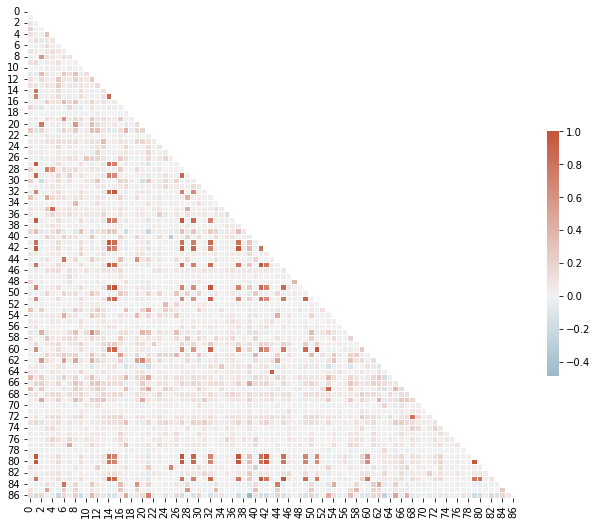

In [11]:
## I used instructions from here https://seaborn.pydata.org/examples/many_pairwise_correlations.html
## to create a diagnonal correlation heatmap...

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can explore further which pair of features are highly correlated.

In [12]:
abs_corr_threshold = 0.999
highly_correlated_pairs = []
for j in range(87):
    for i in range(j):
        a_corr = corr.iloc[i,j]
        a_corr_abs = np.abs(a_corr)
        if a_corr_abs > abs_corr_threshold:
            highly_correlated_pairs.append((i,j))

print(highly_correlated_pairs)

[(51, 60)]


In [13]:
def correlated_pairs(threshold):
    pairs = []
    for j in range(87):
        for i in range(j):
            a_corr = corr.iloc[i,j]
            a_corr_abs = np.abs(a_corr)
            if a_corr_abs > threshold:
                pairs.append((i,j,round(a_corr,3)))
    return pairs
threshold = 0.99
print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')
threshold = 0.98
print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')
threshold = 0.95
print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')
threshold = 0.90
print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')
# threshold = 0.80
# print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')
# threshold = 0.70
# print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')


correlated pairs with correlation (i,j, correlation) at threshold = 0.99 
  [(15, 49, 0.993), (51, 60, 1.0), (42, 80, 0.999), (45, 83, 0.992)]
correlated pairs with correlation (i,j, correlation) at threshold = 0.98 
  [(27, 37, 0.989), (14, 41, 0.98), (14, 45, 0.98), (15, 49, 0.993), (32, 49, 0.983), (51, 60, 1.0), (1, 79, 0.985), (27, 79, 0.983), (37, 79, 0.988), (42, 79, 0.981), (42, 80, 0.999), (45, 83, 0.992)]
correlated pairs with correlation (i,j, correlation) at threshold = 0.95 
  [(1, 27, 0.971), (15, 32, 0.976), (1, 37, 0.977), (27, 37, 0.989), (14, 41, 0.98), (1, 42, 0.971), (27, 42, 0.971), (37, 42, 0.977), (14, 45, 0.98), (41, 45, 0.977), (15, 49, 0.993), (32, 49, 0.983), (51, 60, 1.0), (1, 79, 0.985), (27, 79, 0.983), (37, 79, 0.988), (42, 79, 0.981), (1, 80, 0.97), (27, 80, 0.97), (37, 80, 0.976), (42, 80, 0.999), (79, 80, 0.98), (14, 83, 0.978), (41, 83, 0.969), (45, 83, 0.992)]
correlated pairs with correlation (i,j, correlation) at threshold = 0.9 
  [(1, 27, 0.971),

Possibly several of the highly correlated features could be 
removed without affecting the prediction accuracy of a classification model. Inspecting the above pairwise correllations
and proceeding heuristically I propose to remove features at indicies 
49, 60, 80, 83, 37, 41, 45, 49, 79, 27, 32, 42, 64

In [14]:
## Make a copy, drop the designated feature columns, and compute a new correlation matrix:
df3 = df2.copy()
indicies_to_drop = [49, 60, 80, 83, 37, 41, 45, 79, 27, 32, 42, 64]
column_names_to_drop = [column_numbers[x] for x in indicies_to_drop]
df3.drop(inplace=True, columns=column_names_to_drop)
corr = df3.corr()

In [15]:
def correlated_pairs(threshold):
    pairs = []
    for j in range(df3.shape[1]):
        for i in range(j):
            a_corr = corr.iloc[i,j]
            a_corr_abs = np.abs(a_corr)
            if a_corr_abs > threshold:
                pairs.append((i,j,round(a_corr,3)))
    return pairs


threshold = 0.99
print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')
threshold = 0.98
print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')
threshold = 0.95
print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')
threshold = 0.90
print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')
threshold = 0.80
print(f'correlated pairs with correlation (i,j, correlation) at threshold = {threshold} \n  {correlated_pairs(threshold)}')


correlated pairs with correlation (i,j, correlation) at threshold = 0.99 
  []
correlated pairs with correlation (i,j, correlation) at threshold = 0.98 
  []
correlated pairs with correlation (i,j, correlation) at threshold = 0.95 
  []
correlated pairs with correlation (i,j, correlation) at threshold = 0.9 
  []
correlated pairs with correlation (i,j, correlation) at threshold = 0.8 
  [(1, 14, 0.802), (14, 15, 0.85), (1, 28, 0.88), (4, 33, 0.854), (6, 39, 0.808), (15, 44, 0.889), (46, 58, 0.885), (59, 63, 0.822), (6, 72, 0.83)]


We have removed 12 of the feature columns, although there are still some correlations above 0.80. We plan to split the data set
70% for training and 30% for test. We will use the test data to evaluate competing models.


In [16]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df3, test_size=0.30, random_state=47)
print(df_train.shape)
print(df_test.shape)

(20532, 75)
(8800, 75)


In [17]:
## The last column of each data set contains the label now renamed '86'.
malware_samples_train = df_train['86'].sum()
benign_samples_train = df_train.shape[0] - malware_samples_train
print (f'malware_samples_train = {malware_samples_train}')
print (f'benign_samples_train = {benign_samples_train}')

malware_samples_train = 10248
benign_samples_train = 10284


The training sample labels are still relatively balanced between malware and benign after the split.


In [18]:
## We will now save the  train and test data sets as separate CSV files to use in other notebooks for modelling.
df_train.to_csv("data/train_data.csv", index=False)
df_test.to_csv("data/test_data.csv", index=False)